In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the Wisconsin Breast Cancer dataset
file_path = r"C:\Users\Shaurya\Desktop\AI4BCancer\Dataset\data.csv"
df = pd.read_csv(file_path)

In [3]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

In [4]:
# Encode the 'diagnosis' column (M=1, B=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [5]:
# Handle missing values by dropping rows with null values
df = df.dropna()

In [6]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Implement and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the model on the test set
y_pred = random_forest_model.predict(X_test_scaled)

In [11]:
# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



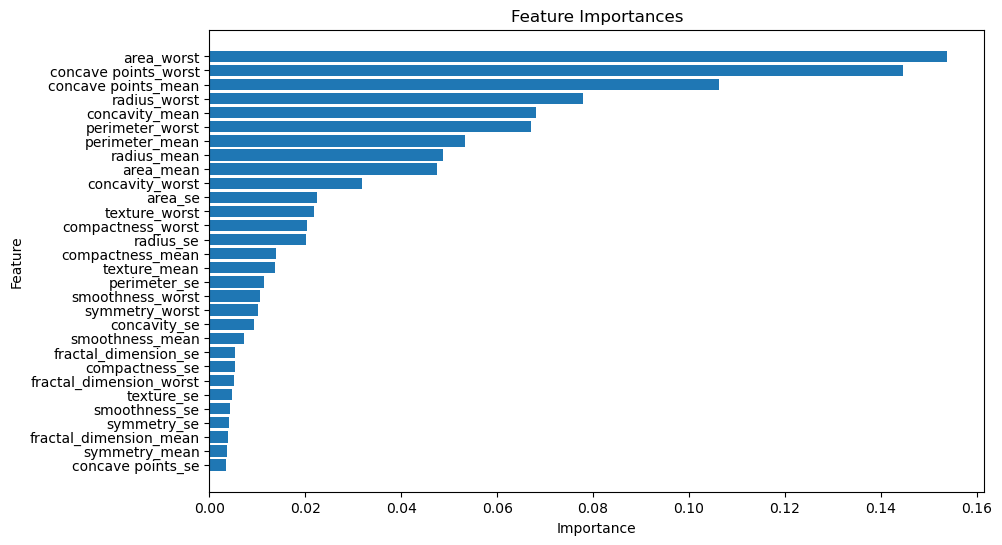


Sorted Feature Importances:
                    feature  importance
23               area_worst    0.153892
27     concave points_worst    0.144663
7       concave points_mean    0.106210
20             radius_worst    0.077987
6            concavity_mean    0.068001
22          perimeter_worst    0.067115
2            perimeter_mean    0.053270
0               radius_mean    0.048703
3                 area_mean    0.047555
26          concavity_worst    0.031802
13                  area_se    0.022407
21            texture_worst    0.021749
25        compactness_worst    0.020266
10                radius_se    0.020139
5          compactness_mean    0.013944
1              texture_mean    0.013591
12             perimeter_se    0.011303
24         smoothness_worst    0.010644
28           symmetry_worst    0.010120
16             concavity_se    0.009386
4           smoothness_mean    0.007285
19     fractal_dimension_se    0.005321
15           compactness_se    0.005253
29  fractal

In [12]:
# Feature importance based on mean decrease in impurity
feature_importance = random_forest_model.feature_importances_
importance_df = pd.DataFrame(list(zip(X.columns, feature_importance)), columns=['feature', 'importance'])
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.title('Feature Importances')
plt.show()

# Print the sorted feature importances
print("\nSorted Feature Importances:")
print(importance_df)

In [13]:
# Detailed Feature Explanations with General Definitions
feature_explanations = {
    "area_worst": "The area of the worst segment of the tumor, indicating the size of the tumor in its most severe state.",
    "concave points_worst": "The number of concave portions on the contour in the worst segment of the tumor, suggesting more irregularity and complexity.",
    "concave points_mean": "The average number of concave portions found on the contour of the tumor, a measure of tumor contour irregularities.",
    "radius_worst": "The mean of the distances from the center to points on the perimeter, measured in the tumor's worst area, indicating tumor size.",
    "concavity_mean": "The average severity of concave portions of the contour across the tumor, representing the depth of tumor indentations.",
    "perimeter_worst": "The size of the perimeter in the worst segment of the tumor, indicating the overall size and extent.",
    "perimeter_mean": "The average size of the perimeter of the tumor, a measure of the overall dimensions of the tumor.",
    "radius_mean": "The average of distances from the center to points on the perimeter of the tumor, a measure of tumor size.",
    "area_mean": "The average area of the tumor, providing a general measure of tumor size.",
    "concavity_worst": "The severity of concave portions of the contour in the worst segment of the tumor, indicating the degree of tumor irregularity.",
    "area_se": "The standard error of the tumor area, a measure of the variability of tumor size.",
    "texture_worst": "The texture in the worst segment of the tumor, measured as the standard deviation of gray-scale values, indicating variations in tissue density.",
    "compactness_worst": "The compactness of the tumor in its worst segment, calculated as (perimeter^2 / area - 1.0), a measure of the tumor's complexity.",
    "radius_se": "The standard error of the mean radius, indicating the variability in tumor size.",
    "compactness_mean": "The mean compactness of the tumor, a measure of the complexity of the tumor shape.",
    "texture_mean": "The average texture of the tumor, representing the standard deviation of gray-scale values in the tissue.",
    "perimeter_se": "The standard error of the size of the tumor perimeter, indicating the variability in the tumor's overall shape.",
    "smoothness_worst": "The local variation in radius lengths in the worst segment of the tumor, indicating changes in tissue texture.",
    "symmetry_se": "The standard error in the symmetry of the tumor, indicating the variability in the tumor's symmetry.",
    "fractal_dimension_se": "The standard error in the 'coastline approximation' - 1, a measure of tumor contour complexity.",
    "texture_se": "The standard error in the texture of the tumor, indicating variability in tissue density.",
    "symmetry_mean": "The average symmetry of the tumor, representing the balance in shape and structure of the tumor.",
    "smoothness_se": "The standard error in the local variation of radius lengths of the tumor, indicating variability in tissue texture.",
    "fractal_dimension_worst": "The 'coastline approximation' - 1, measured in the tumor's worst area, a measure of contour complexity.",
    "concavity_se": "The standard error of the severity of concave portions of the tumor contour, indicating variability in the depth of tumor indentations.",
    "fractal_dimension_mean": "The average 'coastline approximation' - 1, a general measure of tumor contour complexity.",
    "smoothness_mean": "The mean of local variation in radius lengths of the tumor, indicating the average texture of the tissue.",
    "compactness_se": "The standard error in the compactness of the tumor, indicating variability in the complexity of the tumor shape.",
    "symmetry_worst": "The symmetry in the worst segment of the tumor, indicating the balance in shape and structure in the most severe part of the tumor.",
    "concave points_se": "The standard error in the number of concave portions found on the tumor contour, indicating variability in the irregularities of the tumor contour."
}

print("\nDetailed Feature Explanations:")
for index, row in importance_df.iterrows():
    feature_name = row['feature']
    importance_value = row['importance']
    detailed_explanation = feature_explanations.get(feature_name, "No explanation available")
    print(f"{feature_name} (Importance: {importance_value:.4f}): {detailed_explanation}")


Detailed Feature Explanations:
area_worst (Importance: 0.1539): The area of the worst segment of the tumor, indicating the size of the tumor in its most severe state.
concave points_worst (Importance: 0.1447): The number of concave portions on the contour in the worst segment of the tumor, suggesting more irregularity and complexity.
concave points_mean (Importance: 0.1062): The average number of concave portions found on the contour of the tumor, a measure of tumor contour irregularities.
radius_worst (Importance: 0.0780): The mean of the distances from the center to points on the perimeter, measured in the tumor's worst area, indicating tumor size.
concavity_mean (Importance: 0.0680): The average severity of concave portions of the contour across the tumor, representing the depth of tumor indentations.
perimeter_worst (Importance: 0.0671): The size of the perimeter in the worst segment of the tumor, indicating the overall size and extent.
perimeter_mean (Importance: 0.0533): The ave

In [15]:
# Highlight the top 5 features
print("\nTop 5 Most Important Features for Predicting Breast Cancer:")
top_5_features = importance_df.head(5)
for index, row in top_5_features.iterrows():
    print(f"- {row['feature']} (Importance: {row['importance']:.4f})")


Top 5 Most Important Features for Predicting Breast Cancer:
- area_worst (Importance: 0.1539)
- concave points_worst (Importance: 0.1447)
- concave points_mean (Importance: 0.1062)
- radius_worst (Importance: 0.0780)
- concavity_mean (Importance: 0.0680)
